In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_and_visualize_hourly_data(header_lines, file_path, output_value_name):
    """
    Process hourly data, calculate daily averages, and create visualizations.
    
    Parameters:
    header_lines (int): The number of header lines to skip
    file_path (str): The path of the data file
    output_value_name (str): The name of the value column in the output DataFrame
    
    Returns:
    pd.DataFrame: Processed daily average DataFrame
    """
    
    def process_hourly_data(header_lines, file_path, output_value_name):
        df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')
        
        if 'value' in df.columns:
            df_cleaned = df[df['value'] != -999.99]
        else:
            df.columns = ['year', 'month', 'day', 'hour', 'minute', 'value', 'std']
            df = df.drop(columns=['minute', 'std'])
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            df_cleaned = df[~df['value'].isna()]
        
        daily_avg = (
            df_cleaned.groupby(['year', 'month', 'day'])['value']
            .mean()
            .round(3)
            .reset_index()
            .rename(columns={'value': output_value_name}) 
        )
        
        return daily_avg
    result = process_hourly_data(header_lines, file_path, output_value_name)
    
    result['date'] = pd.to_datetime(result[['year', 'month', 'day']])
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)
    
    return result


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_5847/524663225.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_boxplot(sites_data, max_threshold=800):
    all_data = []
    
    for site_name, df in sites_data.items():
        matching_cols = [col for col in df.columns if col.lower() == site_name.lower()]
        
        if not matching_cols:
            raise ValueError(f"in{site_name} not found")
            
        value_col = matching_cols[0]
        
        temp_df = df[[value_col]].copy()
        temp_df['Site'] = site_name 
        temp_df = temp_df.rename(columns={value_col: 'Value'})
        all_data.append(temp_df)
    
    combined_df = pd.concat(all_data)
    
    plt.figure(figsize=(6, 8))
    sns.set(style="whitegrid", palette="pastel")

    combined_df = combined_df[combined_df['Value'] <= max_threshold] 
    return combined_df

sites_data = {
    'AMT' : process_and_visualize_hourly_data(161, 'co2_amt_tower-insitu_1_ccgg_HourlyData.txt', 'amt'),
    'BAO' : process_and_visualize_hourly_data(165, 'co2_bao_tower-insitu_1_ccgg_HourlyData.txt', 'bao'),
    'BRW' : process_and_visualize_hourly_data(164, 'co2_brw_surface-insitu_1_ccgg_HourlyData.txt', 'brw'),
    'CRV' : process_and_visualize_hourly_data(196, 'co2_crv_tower-insitu_1_ccgg_HourlyData.txt', 'crv'),
    'LEF' : process_and_visualize_hourly_data(188, 'co2_lef_tower-insitu_1_ccgg_HourlyData.txt', 'lef'),
    'MBO' : process_and_visualize_hourly_data(160, 'co2_mbo_surface-insitu_1_ccgg_HourlyData.txt', 'mbo'),
    'MLO' : process_and_visualize_hourly_data(165, 'co2_mlo_surface-insitu_1_ccgg_HourlyData.txt', 'mlo'),
    'SCT' : process_and_visualize_hourly_data(168, 'co2_sct_tower-insitu_1_ccgg_HourlyData.txt', 'sct'),
    'SMO' : process_and_visualize_hourly_data(164, 'co2_smo_surface-insitu_1_ccgg_HourlyData.txt', 'smo'),
    'SNP' : process_and_visualize_hourly_data(167, 'co2_snp_surface-insitu_1_ccgg_HourlyData.txt', 'snp'),
    'SPO' : process_and_visualize_hourly_data(164, 'co2_spo_surface-insitu_1_ccgg_HourlyData.txt', 'spo'),
    'WBI' : process_and_visualize_hourly_data(162, 'co2_wbi_tower-insitu_1_ccgg_HourlyData.txt', 'wbi'),
    'WGC' : process_and_visualize_hourly_data(204, 'co2_wgc_tower-insitu_1_ccgg_HourlyData.txt', 'wgc'),
    'WKT' : process_and_visualize_hourly_data(156, 'co2_wkt_tower-insitu_1_ccgg_HourlyData.txt', 'wkt')
}

combined_data = plot_combined_boxplot(sites_data, max_threshold=800)




过滤前数据量: 121714
过滤后数据量: 121713
过滤掉的数据量: -29257


<Figure size 600x800 with 0 Axes>

In [3]:

pivot_dfs = []

for site_name, df in sites_data.items():

    value_col = [col for col in df.columns if col.lower() == site_name.lower()][0]
    
    site_series = df[value_col].rename(site_name)
    pivot_dfs.append(site_series)

corr_df = pd.concat(pivot_dfs, axis=1)

print(corr_df.head())

宽表数据样例：
            AMT  BAO      BRW  CRV  LEF  MBO  MLO  SCT  SMO  SNP  SPO  WBI  \
date                                                                         
1973-07-24  NaN  NaN  325.555  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-25  NaN  NaN  325.453  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-26  NaN  NaN  326.150  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-27  NaN  NaN  325.434  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-28  NaN  NaN  324.445  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            WGC  WKT  
date                  
1973-07-24  NaN  NaN  
1973-07-25  NaN  NaN  
1973-07-26  NaN  NaN  
1973-07-27  NaN  NaN  
1973-07-28  NaN  NaN  


In [4]:
def iqr_outlier_processing(df, multiplier=1.0):

    processed_df = df.copy()
    outlier_stats = {}
    
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        
        is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = is_outlier.sum()
        
        processed_df[column] = df[column].mask(is_outlier).interpolate()
        
        outlier_stats[column] = {
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2),
            'outliers': outlier_count,
            'percentage': round(outlier_count / len(df) * 100, 2)
        }
    
    return processed_df, outlier_stats

# corr_df, stats = iqr_outlier_processing(corr_df)

# print("{:<5} {:<10} {:<10} {:<10} {:<10}".format(
#     "Site", "Lower", "Upper", "Outliers", "Percent%"))
# for site, data in stats.items():
#     print("{:<5} {:<10.2f} {:<10.2f} {:<10} {:<10.2f}%".format(
#         site, data['lower_bound'], data['upper_bound'], 
#         data['outliers'], data['percentage']))

Site  Lower      Upper      Outliers   Percent%  
AMT   371.47     440.29     60         0.32      %
BAO   383.46     418.29     89         0.47      %
BRW   303.31     441.39     1          0.01      %
CRV   392.62     434.75     35         0.19      %
LEF   367.48     438.27     48         0.26      %
MBO   385.88     434.83     5          0.03      %
MLO   304.55     437.42     0          0.00      %
SCT   383.82     440.86     49         0.26      %
SMO   307.39     433.34     0          0.00      %
SNP   376.69     438.28     100        0.53      %
SPO   308.61     433.01     1          0.01      %
WBI   375.19     443.83     129        0.69      %
WGC   379.04     447.21     145        0.77      %
WKT   367.90     444.80     7          0.04      %


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


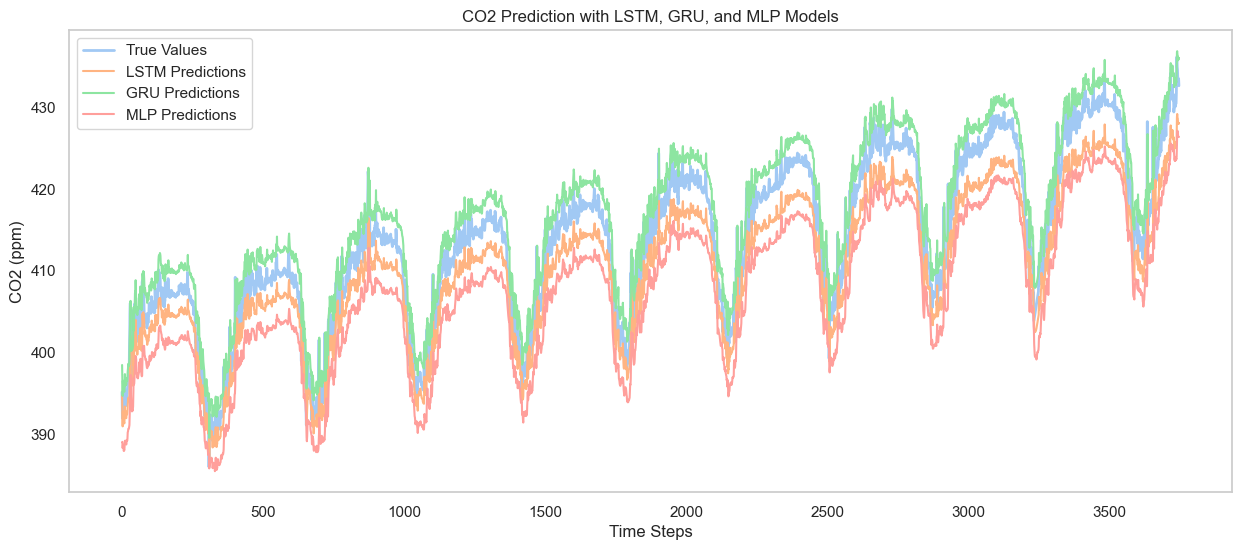

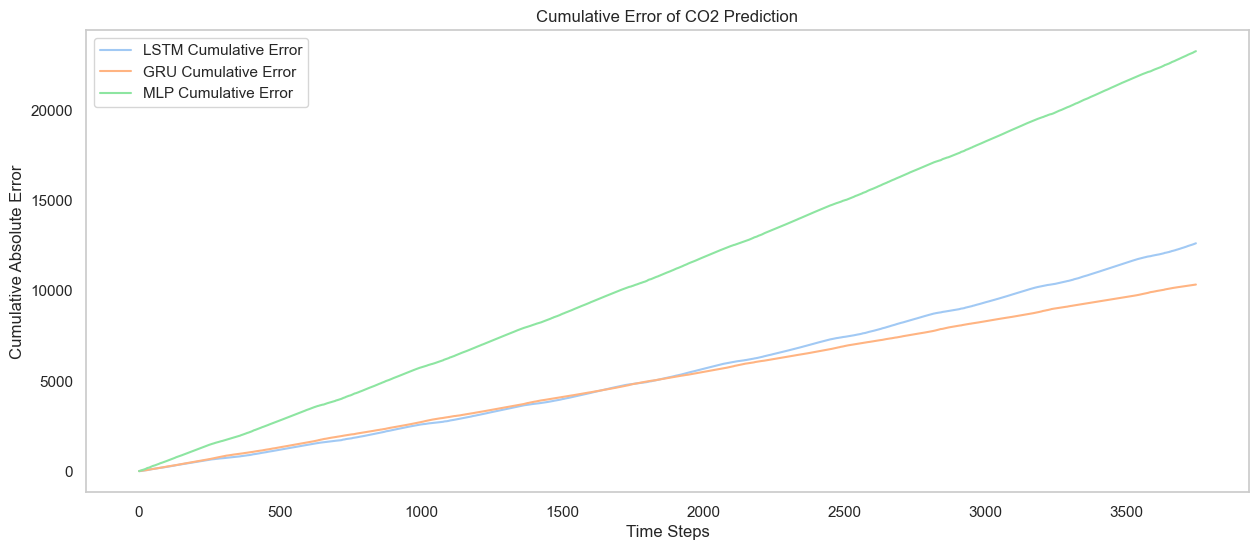

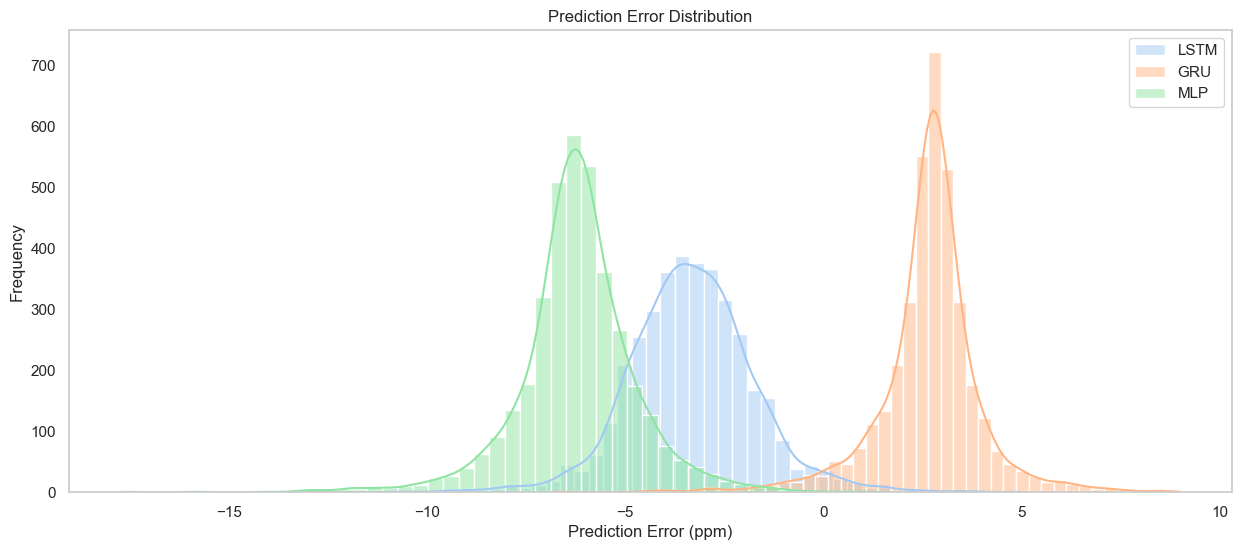

LSTM Model - MSE: 13.5289, MAE: 3.3696
GRU Model - MSE: 8.8486, MAE: 2.7595
MLP Model - MSE: 40.7708, MAE: 6.2099


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

data = corr_df[['BRW']].dropna()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=30):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30
X, y = create_dataset(data_scaled, look_back)

split_train = int(len(X) * 0.6)
split_val = int(len(X) * 0.8)

X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:], y[split_val:]

X_train_rnn = X_train.reshape((X_train.shape[0], look_back, 1))
X_val_rnn = X_val.reshape((X_val.shape[0], look_back, 1))
X_test_rnn = X_test.reshape((X_test.shape[0], look_back, 1))

def build_model(model_type='LSTM'):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(128, return_sequences=True, input_shape=(look_back, 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(64))
    elif model_type == 'GRU':
        model.add(GRU(128, return_sequences=True, input_shape=(look_back, 1)))
        model.add(Dropout(0.2))
        model.add(GRU(64))
    elif model_type == 'MLP':
        model.add(Flatten(input_shape=(look_back, 1)))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

models = {}
for model_name in ['LSTM', 'GRU', 'MLP']:
    model = build_model(model_name)
    model.fit(X_train_rnn, y_train, epochs=50, batch_size=32,
              validation_data=(X_val_rnn, y_val), verbose=0)
    models[model_name] = model

predictions = {}
errors = {}
for model_name, model in models.items():
    pred = model.predict(X_test_rnn)
    predictions[model_name] = scaler.inverse_transform(pred)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    errors[model_name] = predictions[model_name] - y_test_actual

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label='True Values', linewidth=2)
for model_name, pred in predictions.items():
    plt.plot(pred, label=f'{model_name} Predictions')
plt.title('CO2 Prediction with LSTM, GRU, and MLP Models')
plt.xlabel('Time Steps')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
for model_name, err in errors.items():
    plt.plot(np.cumsum(np.abs(err)), label=f'{model_name} Cumulative Error')
plt.title('Cumulative Error of CO2 Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Absolute Error')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
for model_name, err in errors.items():
    sns.histplot(err.flatten(), kde=True, label=f'{model_name}', bins=50)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (ppm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# 输出误差指标
for model_name, pred in predictions.items():
    mse = mean_squared_error(y_test_actual, pred)
    mae = mean_absolute_error(y_test_actual, pred)
    print(f'{model_name} Model - MSE: {mse:.4f}, MAE: {mae:.4f}')


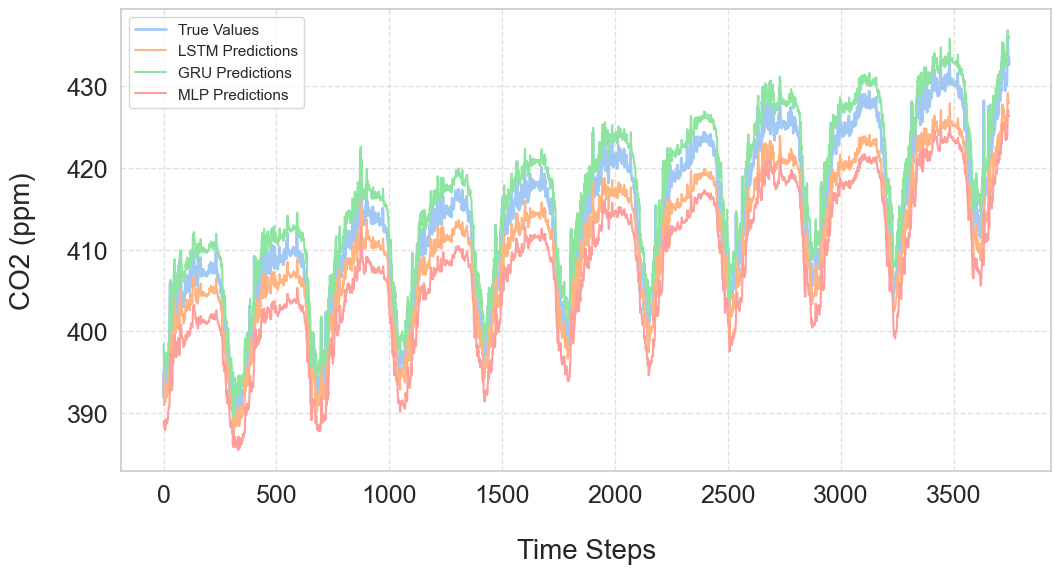

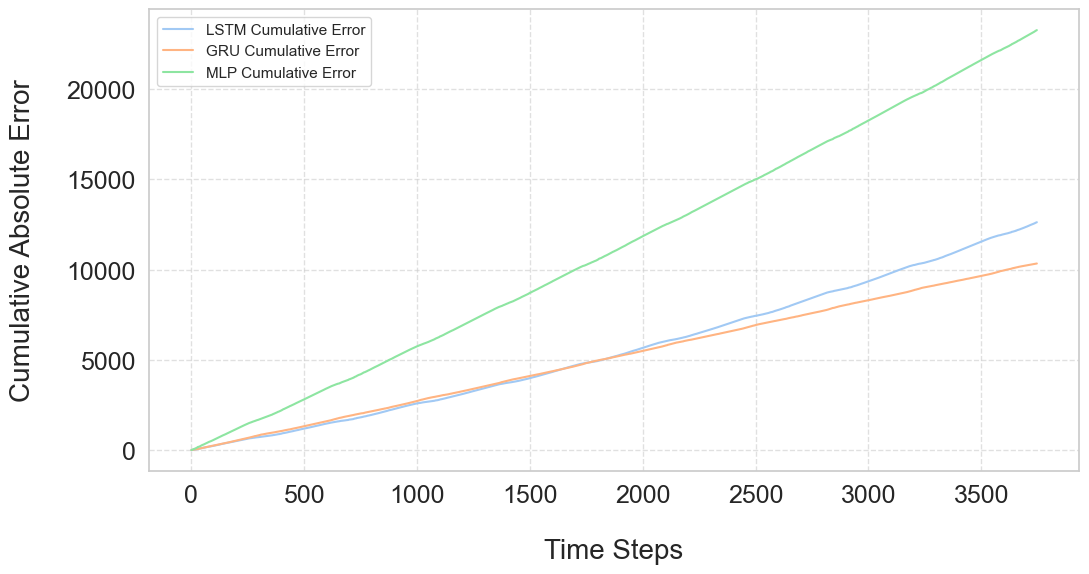

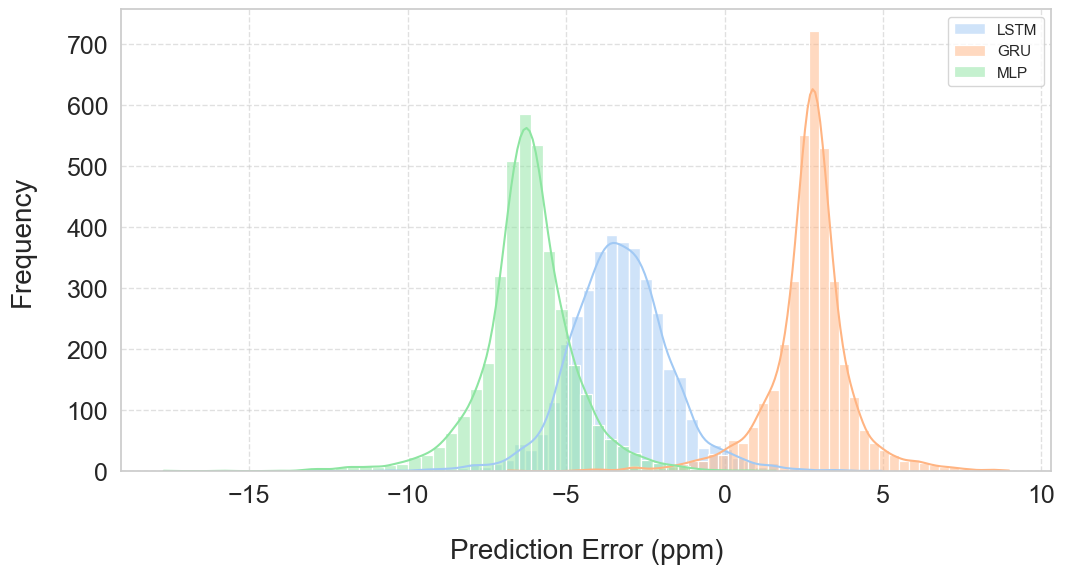

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Values', linewidth=2)
for model_name, pred in predictions.items():
    plt.plot(pred, label=f'{model_name} Predictions')
# plt.title('CO2 Prediction with LSTM, GRU, and MLP Models')
plt.xlabel('Time Steps', fontsize=20, labelpad=22)
plt.ylabel('CO2 (ppm)', fontsize=20, labelpad=22)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
for model_name, err in errors.items():
    plt.plot(np.cumsum(np.abs(err)), label=f'{model_name} Cumulative Error')
# plt.title('Cumulative Error of CO2 Prediction')
plt.xlabel('Time Steps', fontsize=20, labelpad=22)
plt.ylabel('Cumulative Absolute Error', fontsize=20, labelpad=22)
plt.legend()
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
for model_name, err in errors.items():
    sns.histplot(err.flatten(), kde=True, label=f'{model_name}', bins=50)
# plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (ppm)', fontsize=20, labelpad=22)
plt.ylabel('Frequency', fontsize=20, labelpad=22)
plt.legend()
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)  
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [7]:
from sklearn.metrics import r2_score 

for model_name, pred in predictions.items():
    mse = mean_squared_error(y_test_actual, pred)
    mae = mean_absolute_error(y_test_actual, pred)
    r2 = r2_score(y_test_actual, pred)  
    print(f'{model_name} Model - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')

LSTM Model - MSE: 13.5289, MAE: 3.3696, R2: 0.8577
GRU Model - MSE: 8.8486, MAE: 2.7595, R2: 0.9069
MLP Model - MSE: 40.7708, MAE: 6.2099, R2: 0.5712


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Flatten

stations = corr_df.columns.tolist()

def run_model_for_station(data, look_back=30):

    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    def create_dataset(dataset, look_back):
        X, Y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    X, y = create_dataset(data_scaled, look_back)
    split_train = int(len(X) * 0.6)
    split_val = int(len(X) * 0.8)

    X_train, y_train = X[:split_train], y[:split_train]
    X_val, y_val = X[split_train:split_val], y[split_train:split_val]
    X_test, y_test = X[split_val:], y[split_val:]

    X_train_rnn = X_train.reshape((X_train.shape[0], look_back, 1))
    X_val_rnn = X_val.reshape((X_val.shape[0], look_back, 1))
    X_test_rnn = X_test.reshape((X_test.shape[0], look_back, 1))

    results = {}

    def build_model(model_type):
        model = Sequential()
        if model_type == 'LSTM':
            model.add(LSTM(128, return_sequences=True, input_shape=(look_back, 1)))
            model.add(Dropout(0.2))
            model.add(LSTM(64))
        elif model_type == 'GRU':
            model.add(GRU(128, return_sequences=True, input_shape=(look_back, 1)))
            model.add(Dropout(0.2))
            model.add(GRU(64))
        elif model_type == 'MLP':
            model.add(Flatten(input_shape=(look_back, 1)))
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(64, activation='relu'))

        model.add(Dropout(0.3))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')
        return model

    for model_name in ['LSTM', 'GRU', 'MLP']:
        model = build_model(model_name)
        model.fit(X_train_rnn, y_train, epochs=50, batch_size=32,
                  validation_data=(X_val_rnn, y_val), verbose=0)

        pred = model.predict(X_test_rnn)
        pred_rescaled = scaler.inverse_transform(pred)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        mse = mean_squared_error(y_test_actual, pred_rescaled)
        results[f'{model_name}_MSE'] = mse

    return results

results_dict = {}
for station in stations:
    series = corr_df[[station]].dropna()
    if len(series) < 100:
        continue
    print(f'Processing station: {station}')
    result = run_model_for_station(series)
    results_dict[station] = result

results_df = pd.DataFrame(results_dict).T  
print(results_df)
# results_df.to_csv('mse_results_all_stations.csv')


Processing station: AMT


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
Processing station: BAO


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
Processing station: BRW


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
Processing station: CRV


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
Processing station: LEF


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
Processing station: MBO


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
Processing station: MLO


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step
Processing station: SCT


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
Processing station: SMO


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step
Processing station: SNP


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
Processing station: SPO


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
Processing station: WBI


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
Processing station: WGC


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
Processing station: WKT


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
      LSTM_MSE    GRU_MSE    MLP_MSE
AMT  66.296324  39.227971  15.012745
BAO   0.118773   0.005481   0.510346
BRW  21.766444   4.127160  97.673841
CRV   3.629488   4.066031   7.622173
LEF  18.881394  17.839410  32.804037
MBO   1.749654   5.797933   9.728529
MLO   2.392894  16.596304  16.764168
SCT  17.739906  13.701968  17.762614
SMO   2.352529   8.715454  30.957832
SNP  11.662757  13.367822  26.454409
SPO  15.243149  22.685147  83.359814
WBI  24.456441  23.311649  33.421989
WGC  18.945353  18.938394  17.031461
WKT  19.302411  11.152927  12.473252
